## **Generación de nombres de dinosaurios con una red Neuronal Recurrente**

El siguiente ejemplo es una réplicadel que se localiza en https://www.codificandobits.com/blog/tutorial-generacion-de-texto-con-redes-recurrentes-python/#predicci%C3%B3n-con-la-red-recurrente-generaci%C3%B3n-de-nombres-de-dinosaurios

Su autor original es Miguel Sotaquirá.

*Este ejemplo mostrará cómo las RNN tienen una memoria demasiado a corto plazo, por lo que, con cada caracter generado el nombre de dinosaurio va teniendo cada vez menos sentido, o lo que es lo mismo, si el resultado es un nombre corto, se parece bastante a un nombre de dinosaurio, pero si el nombre reusltante es más largo, deja de parecerlo.*

En el ejemplo se emplea la librería **Keras**, basada en **Tensorflow**, para crear la red neuronal.

Se recomienda encarecidamente al alumno que, a mopdo de ampliacion de conocimientos técnicos, revise y practique con la librería Keras, diferentes ejemplos de redes neuronales, empleando distintas capas y funciones de acftivación. Para ello, se sugierem a lo largo de este ejmplo, un libro muy interesante en español.

### **Importación de librerías y prefijado de semilla**

Se importan las librerías y objetos necesarios.

Se prefija la semilla de generación aleatoria para asegurar la reproductibilidad

In [1]:
# Importación de las librerías necesarias
import numpy as np # numpy
from keras.layers import Input, Dense, SimpleRNN #Capas de RN que se emplearán
from keras.models import Model # objeto model
from keras.optimizers import SGD #optimizador por descenso de grad
from keras.utils import to_categorical # para la convers. de datos a categóricos
from keras import backend as K # backend de Keras

# se inicializa la semilla aleatoria para conseguir un comportamiento igual en
# todas las ehecuciones
np.random.seed(5)



### **Preparacion de la data**
Se lee el dataset con el que va a entrenarse la red y se preparan diccionarios para convertir cada caracter a un índice.

Ojo, usaremos la técnica One Hot en el entrenamiento para representar cada caracter.

Puedes consultar cómo funciona esta técnica en

https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python

In [3]:
# lectura del fichero con el dataset de entrenamiento
# debes descargar el fichero a tu máquina y subirlo luego a collaboratory
nombres = open('nombres_dinosaurios.txt','r').read()
nombres = nombres.lower()


# al no poder introducir caracteres a la red, se sustituirá cada uno de ellos
# por un número.Así, se genera el alfabeto, lista de los caracteres del fichero
# sin que se repitan
alfabeto = list(set(nombres))
tam_datos, tam_alfabeto = len(nombres), len(alfabeto)


# para el entrenamiento se empleará "One Hot Encoding" con cada uno de los
# caracteres.
# se crea, por lo tanto, un diciconario python que permita convertir de
# caracter a numero y al reves.
car_a_ind = { car:ind for ind,car in enumerate(sorted(alfabeto))}
ind_a_car = { ind:car for ind,car in enumerate(sorted(alfabeto))}

### **Construcción de la red**
Como ya se ha explicado antes, elmodelo tendrá dos entradas y dos salidas:

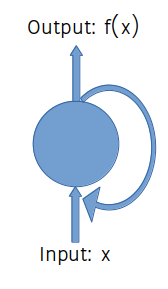

Entradas:
1.   x: Carácter de entrenamiento
2.   a<t-1>: Estado oculto del time-etep anterior

Salidas:
1.   y: PRedicción, el carácter siguiente, generado por la red
2.   a<t>: Nuevio estado oculto que alimentará a la entrada del siguiente time-step

Tanto la x como la y se representarán en formato OneHot

Como se va a crear una capa oculta de 25 neuronas, la memoria oculta será un vector de 25 posiciones (una celda por cada neurona).

Nota: Dimensionar las capas se considera casi un arte y no hay una forma de aprenderlo salvo por la intuición que se desarrolla con la técnica de prueba y error.

Nota 2: No te preocupes, lhay otro camino "más fácil" ... aprender a usar librerías de AutoML o AutoDL como PyCaret o autokeras, que generan modelos básicos o de Deep Learning de forma automática.

Por lo tanto, para generar el modelo de red recurrente, se va a implementar una arquitectura de red con dos capas.

La primera capa será una celda recurrente, con 25 neuronas, que implementará la función *tanh*, y una capa de salida con la implementación de la función softmax en este caso.

Gráficamente, nuestra red, puede representarse del siguiente modo:

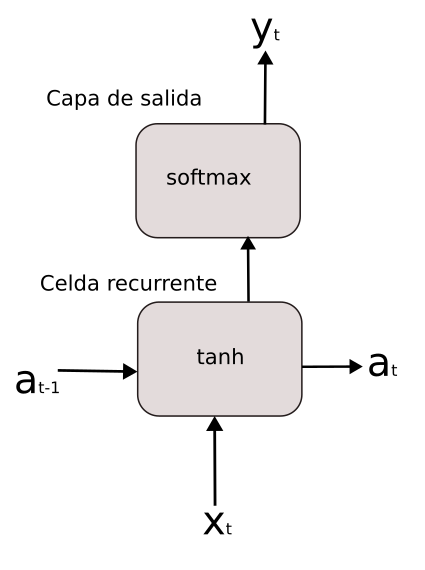


Para crear la celda recurrente se va a emplear la función SimpleRNN, importada, precisamente, para este propósito, ya que es una capa de la librería Keras.

Puede accederse a toda la información relativa a KEras en https://keras.io/
Igualmente se recomienda el libro "Python Deep LEarning", del Dr. Jordi Torres,
docente de la UPC y que colabora activamente con el centro de Supercomputación de Barcelona (BSC). Un libro especialmente interesante. *Tengo el honor de ser mencionado en la página de agradecimientos del mismo*.

In [4]:
# Implementación de la red

# El conocimeitnto de la librería Keras queda fuera del alcance de esta
# asignatura, aunque se recomienta al alumno, encarecidamente, que la estudie,
# ya que resulta de especial interés en materia de aprendizaje automático.

n_a = 25    # Número de unidades en la capa oculta
entrada  = Input(shape=(None,tam_alfabeto)) # la entrada es un OneHot de tamaño 27
a0 = Input(shape=(n_a,)) # estado inicial de la celda de memoria

# Celda recurrente.
celda_recurrente = SimpleRNN(n_a, activation='tanh', return_state = True)

# la capa de activación es una capa densa estándar, que como salida tendrá la
# misma codificacion OneHot.
capa_salida = Dense(tam_alfabeto, activation='softmax')

# Se crea el modelo a partir de las dos capas anteriores y los estados definidos
# al principio de esta celda:
hs, _ = celda_recurrente(entrada, initial_state=a0)
salida = []
salida.append(capa_salida(hs))

# Finalmente se crea el modelo, usando para ello la función Model importada.
# A la función Model se le debe especificar la entrada (las dos entradas) y la
# salida, que es la composición de capas que se ha diseñado.
modelo = Model([entrada,a0],salida)

# Al generar el modelo, com el método compìle, se va a utilizar un optimizador
# SDG, pero el alumno puede probar entre los diferentes optimizadores y observar
# el comportamiento de cualquiera de ellos durante el entrenamiento.
# el parámetro lr -learning rate- es un hiperparámetro que puede ajustarse
# se recomienda comenzart con una tasa de aprendizaje muy baja pero el
# lector puede modificarla y observar cómo varía el entrenamiento.
opt = SGD(lr=0.0005)
modelo.compile(optimizer=opt, loss='categorical_crossentropy')



/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### **Entrenamiento del modelo de RNN**

En primer lugar se preparan los datos de entrada, por lo que se leen los nombres de cada dinosaurio y se mezclan de forma aleatoria (shuffle).

A continuación se implementa una función, ***train_generator***, que prepara la entrada, la salida y el estado de memoria para un dato de entrenamiento tomado de forma aleatoria.

En este método se va generando la Y como el resultado de desplazar a la derecha la X (avanzando caracter a caracter)... El efecto del proceso secuencial de desplazar se obtiene gracias a la instruccion ***yield***, que permite iterar sobre la salida de la función en el buble de entrenamiento.

Puedes consultar el comportamiento de yield, por ejemplo, en
https://alvarohurtado.es/2020/06/08/que-hace-yield-en-python/


Finalmente se implementa el bucle de entrenamiento.

In [5]:
# Leer el datased de entrenamiento
with open("nombres_dinosaurios.txt") as f:
    ejemplos = f.readlines()
ejemplos = [x.lower().strip() for x in ejemplos]
np.random.shuffle(ejemplos)

In [6]:
def train_generator():
    while True:
        # Tomar un ejemplo aleatorio
        ejemplo = ejemplos[np.random.randint(0,len(ejemplos))]

        # Convertir el ejemplo a representación numérica
        X = [None] + [car_a_ind[c] for c in ejemplo]

        # Crear "Y", resultado de desplazar "X" un caracter a la derecha
        Y = X[1:] + [car_a_ind['\n']]

        # Representar "X" y "Y" en formato one-hot
        x = np.zeros((len(X),1,tam_alfabeto))
        onehot = to_categorical(X[1:],tam_alfabeto).reshape(len(X)-1,1,tam_alfabeto)
        x[1:,:,:] = onehot
        y = to_categorical(Y,tam_alfabeto).reshape(len(X),tam_alfabeto)

        # Activación inicial (matriz de ceros)
        a = np.zeros((len(X), n_a))

        yield [x, a], y

In [9]:
# bucle de entrenamiento
BATCH_SIZE = 80			# Número de ejemplos de entrenamiento a usar en cada iteración
NITS = 10000			# Número de iteraciones

for j in range(NITS):
    historia = modelo.fit_generator(train_generator(), steps_per_epoch=BATCH_SIZE, epochs=1, verbose=0)

    # Imprimir evolución del entrenamiento cada 1000 iteraciones
    if j%1000 == 0:
        print('\nIteración: %d, Error: %f' % (j, historia.history['loss'][0]) + '\n')

<ipython-input-9-80d601431b34>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historia = modelo.fit_generator(train_generator(), steps_per_epoch=BATCH_SIZE, epochs=1, verbose=0)



Iteración: 0, Error: 3.329620


Iteración: 1000, Error: 2.393469


Iteración: 2000, Error: 2.240348


Iteración: 3000, Error: 2.175583


Iteración: 4000, Error: 2.196386


Iteración: 5000, Error: 2.152446


Iteración: 6000, Error: 2.136137


Iteración: 7000, Error: 2.218797


Iteración: 8000, Error: 2.176008


Iteración: 9000, Error: 2.178947



### **Predicción usando las capas de la red recurrente**

Para generar nuevos nombres de dinosaurio se va a emplear el mismo modelo, pero una vez entrenado, claro.
Se va a implementar un método, *generar_nombre*, que utilice el modelo para generar nombres de dinosaurio.

El alumno puede observar que este método no utiliza el modelo, ya que realmente enlaza las llamadas a sus dos capas (recurrente y densa), de hecho, el modelo no se está utilizando en esta funcion, sino que se usan cada una de las capas que lo definen. Esta no es la forma adecuada de trabajar, pero resulta muy ilustrativa para comprender cómo la salida de la capa recurrente enlaza con la entrada de la capa densa.





In [10]:
def generar_nombre(car_a_num,tam_alfabeto,n_a):
    # Inicializar x y a con ceros
    x = np.zeros((1,1,tam_alfabeto,))
    a = np.zeros((1, n_a))

    # Inicialización del nombre generado y caracter de fin de linea
    nombre_generado = ''

    # caracter de finalizacion de linea
    fin_linea = '\n'

    # índice del carácter de control. Al alcanzar fin de linea, termina la
    # generación del nombre.
    car = -1

    # Iterar sobre el modelo y generar predicción hasta tanto no se alcance
    # "fin_linea" o el nombre generado llegue a los 50 caracteres
    contador = 0
    while (car != fin_linea and contador != 50):
          # Generar predicción usando la celda RNN
          a, _ = celda_recurrente(K.constant(x), initial_state=K.constant(a))
          y = capa_salida(a)
          prediccion = K.eval(y)

          # Escoger aleatoriamente un elemento de la predicción (el elemento con
          # con probabilidad más alta tendrá más opciones de ser seleccionado)
          ix = np.random.choice(list(range(tam_alfabeto)),p=prediccion.ravel())

          # Convertir el elemento seleccionado a caracter y añadirlo al nombre generado
          car = ind_a_car[ix]
          nombre_generado += car

          # Crear x_(t+1) = y_t, y a_t = a_(t-1)
          x = to_categorical(ix,tam_alfabeto).reshape(1,1,tam_alfabeto)
          a = K.eval(a)

          # Actualizar contador y continuar
          contador += 1

          # Agregar fin de línea al nombre generado en caso de tener más de 50 caracteres
          if (contador == 50):
            nombre_generado += '\n'

    print(nombre_generado)

### **Predicción con el modelo entrenado**

En este caso si que se va a emplear el modelo. El lector puede observar que la entrada al modelo en un tensor de dimensión 2 (una lista con dos elementos de tipo lista numérica).


In [21]:
def generar_nombre_2(modelo,car_a_num,tam_alfabeto,n_a):
    # Inicializar x y a con ceros
    x = np.zeros((1,1,tam_alfabeto,))
    a = np.zeros((1, n_a))

    # Inicialización del nombre generado y caracter de fin de linea
    nombre_generado = ''

    # caracter de finalizacion de linea
    fin_linea = '\n'

    # índice del carácter de control. Al alcanzar fin de linea, termina la
    # generación del nombre.
    car = -1

    # Iterar sobre el modelo y generar predicción hasta tanto no se alcance
    # "fin_linea" o el nombre generado llegue a los 50 caracteres
    contador = 0
    while (car != fin_linea and contador != 50):
          # Generar predicción usando el modelo
          y = modelo([K.constant(x), K.constant(a)])
          prediccion = K.eval(y)

          # Escoger aleatoriamente un elemento de la predicción (el elemento con
          # con probabilidad más alta tendrá más opciones de ser seleccionado)
          ix = np.random.choice(list(range(tam_alfabeto)),p=prediccion.ravel())

          # Convertir el elemento seleccionado a caracter y añadirlo al nombre generado
          car = ind_a_car[ix]
          nombre_generado += car

          # Crear x_(t+1) = y_t, y a_t = a_(t-1)
          x = to_categorical(ix,tam_alfabeto).reshape(1,1,tam_alfabeto)
          a = K.eval(a)

          # Actualizar contador y continuar
          contador += 1

          # Agregar fin de línea al nombre generado en caso de tener más de 50 caracteres
          if (contador == 50):
            nombre_generado += '\n'

    print(nombre_generado)

### **Uso de las funciones generadoras de nombres**

PLas dos celtas siguientes llaman, respectivamente, a las funciones generadoras.


In [ ]:
print("Nombres con funcion que muestra flujo entre capas de RNN:")
for i in range(20):
    generar_nombre(car_a_ind,tam_alfabeto,n_a)


In [ ]:
print("Nombres con funcion que oculta flujo entre capas:")
for i in range(20):
    generar_nombre_2(modelo,car_a_ind,tam_alfabeto,n_a)